# Classical model
$$\def\time{\left(\tilde{t}\right)}
\def\timedel#1{\left(\tilde{t}-\tilde{\tau}_{#1}\right)}$$

### Notation differences:

* $\tilde{g}_a = \frac{|g|}{\kappa_a}$ conversion strength
* $\tilde{k}_a = \frac{k_a}{\kappa_a}$ feedback strength in mode $\hat{a}$
* $\tilde{k}_b = \frac{k_b}{\kappa_b}$ feedback strength in mode $\hat{b}$
* $\tilde{r} = \frac{\kappa_a}{\kappa_b}$ ratio of decay rates of the modes
* $\tilde{\Omega_a} = \frac{\Omega}{\kappa_a}$ driving strength in mode $\hat{a}$
* $\tilde{\kappa_p} = \frac{\kappa_p}{\kappa_a}$ decay rate of the pump mode compared to mode $\hat{a}$
* $\eta = \frac{|\epsilon|}{\kappa_a}$ driving strength of the parametric pump
* $\delta_a = \frac{\Delta_a}{\kappa_a}$ detuning of mode $\hat{a}$
* $\delta_b = \frac{\Delta_b}{\kappa_a}$ detuning of mode $\hat{b}$
* $\tilde{t} = \kappa_at$ time
* $\tilde{\tau}_a = \kappa_a\tau_a$ time-delay of mode $\hat{a}$ in the feedback loop
* $\tilde{\tau}_b = \kappa_a\tau_b$ time-delay of mode $\hat{b}$ in the feedback loop

### Equations of motion:
$$\begin{align}
\frac{d\alpha}{d\tilde{t}} &= -(1+i\delta_a)\alpha\time + p(t)\beta^*\time + \tilde{g}_ae^{i\chi}\beta\time -\tilde{k}_ae^{i\phi_a}\alpha\timedel{a}\\
\frac{d\beta}{d\tilde{t}} &= -\left(\frac{1}{\tilde{r}}+i\delta_b\right)\beta\time + \tilde{r}p\time\alpha^*\time - \tilde{r}\tilde{g}_ae^{-i\chi}\alpha\time -\frac{\tilde{k}_b}{\tilde{r}}e^{i\phi_b}\beta\timedel{b}\\
\frac{dp}{d\tilde{t}} &= -\tilde{\kappa_p}\left(p\time + \alpha\time\beta\time - \eta e^{i\theta}\right)
\end{align}$$

In [1]:
%matplotlib inline
from math import *
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from pydelay import dde23

## 1. NDPA $\left(\tilde{g}_a = 0\right)$
#### Defining the equations and parameters and add it to one dde structure:

In [78]:
eqnsNDPA = {
    'al:c' : '-(1.+ii*d)*al + p*conj(be) - ka*exp(ii*pha)*al(t-taua)',
    'be:c' : '-(1./kab-ii*d)*be + kab * p*conj(al) - kb/kab*exp(ii*phb)*be(t-taub)',
    'p:c'  : '-kpa * (p + al*be - eta*exp(ii*th))'
    }
    
paramsNDPA = {
            'd'    : 0.2,
            'ka'   : 0.,
            'kb'   : 0.,
            'pha'  : 0.,
            'phb'  : 0.,
            'kab'  : 1.,
            'kpa'  : 2.,
            'eta'  : 1.5,
            'th'   : 0.,
            'taua' : 0.0,
            'taub' : 0.0
                        }

ddeNDPA = dde23(eqns=eqnsNDPA, params=paramsNDPA)
ddeNDPA.set_sim_params(tfinal=1000, dtmax=1.0)

#### Set the history
Constant function is used with the help of python lambda function.

In [79]:
histfuncNDPA = { 'al': lambda t: 0.5,
             'be': lambda t: 0.5,
             'p' : lambda t: 0.5
             }
ddeNDPA.hist_from_funcs(histfuncNDPA, 51)

#### Run the solver

In [80]:
ddeNDPA.run()

#### Sample the solution
The solver use adaptive stepsize. For equal time intervals sampling of the solution is necessary

In [81]:
sol = ddeNDPA.sample(0,100,0.1)
tNDPA  = sol['t']
alNDPA = sol['al']
beNDPA = sol['be']
pNDPA  = sol['p']

#### Plotting the solution

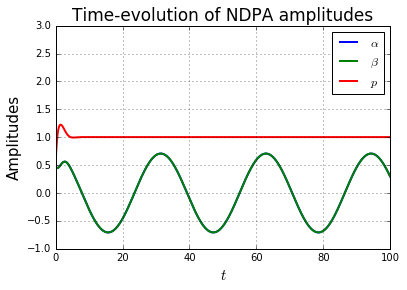

In [82]:
plt.figure(1)
plt.clf()
plt.plot(tNDPA,np.real(alNDPA),linewidth=2.0)
plt.plot(tNDPA,np.real(beNDPA),linewidth=2.0)
plt.plot(tNDPA,np.real(pNDPA),linewidth=2.0)
plt.xlabel('$t$',fontsize=15.)
plt.ylabel('Amplitudes',fontsize=15.)
plt.ylim(-1.,3)
plt.grid(True)
plt.title('Time-evolution of NDPA amplitudes',fontsize=17.)
plt.legend(['$\\alpha$','$\\beta$','$p$'],loc='best')
plt.show()

## Make a plot of x(t) vs x(t-tau):
# Sample the solution twice with a stepsize of dt=0.1:

# once in the interval [515, 1000]
#sol1 = dde.sample(515, 1000, 0.1)
#al1 = sol1['al']

# and once between [500, 1000-15]
#sol2 = dde.sample(514.999, 1000-0.001, 0.1)
#al2 = sol2['al']

#pl.figure(2)
#pl.clf()
#pl.plot(al1, al2)
#pl.xlabel('$\\alpha(t)$')
#pl.ylabel('$\\alpha(t - \\tau)$')
#pl.show()

In [65]:
Nx  = 10
x   = np.zeros(Nx)
amp = np.zeros((Nx,3))
for ix in range(0,Nx+1):
    paramsNDPA['eta'] = ix*0.01
    ddeNDPA = dde23(eqns=eqnsNDPA, params=paramsNDPA)
    ddeNDPA.set_sim_params(tfinal=500, dtmax=1.0)
    histfuncNDPA = { 'al': lambda t: 0.5,
             'be': lambda t: 0.5,
             'p' : lambda t: 0.5
             }
    ddeNDPA.hist_from_funcs(histfuncNDPA, 51)
    ddeNDPA.run()
    sol = ddeNDPA.sample(500,500,1)
    x[ix] = paramsNDPA['eta']
    amp[ix,1] = sol['al']
    amp[ix,2] = sol['be']
    amp[ix,1] = sol['p']

plt.figure(1)
plt.clf()
plt.plot(x,amp,linewidth=2.0)
plt.xlabel('$\eta$',fontsize=15.)
plt.ylabel('Amplitudes',fontsize=15.)
plt.ylim(-1.,3)
plt.grid(True)
plt.title('Bifurcation of NDPA amplitudes',fontsize=17.)
plt.legend(['$\\alpha$','$\\beta$','$p$'],loc='best')
plt.show()

ValueError: Invalid input data

In [74]:
valami = np.zeros(4)
valami

array([ 0.,  0.,  0.,  0.])

## 2. Optomechanics
#### Defining the equations and parameters and add it to one dde structure:

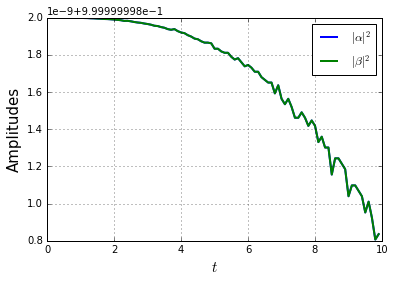

In [43]:
eqnsOPME = {
    'al:c' : '-(1.+ii*da)*al + eta*exp(ii*chi)*conj(be) + ga*be*exp(ii*chi) - ka*exp(ii*pha)*al(t-taua) + om',
    'be:c' : '-(1./kab+ii*db)*be + kab * (eta*exp(ii*chi)*conj(al) - ga*exp(-ii*chi)*al)'
    }
    
paramsOPME = {
            'da'   : 0.,
            'db'   : 1.0,
            'ka'   : 1.0,
            'pha'  : 0.,
            'kab'  : 0.,
            'taua' : 0.,
            'om'   : 10.0,
            'eta'  : 1.,
            'theta': 0.,
            'ga'   : 100.,
            'chi'  : 0.
                        }

ddeOPME = dde23(eqns=eqnsOPME, params=paramsOPME)
ddeOPME.set_sim_params(tfinal=10000, dtmax=1.0)

histfuncOPME = { 'al': lambda t: 1.,
                 'be': lambda t: 1.,
                 }
ddeOPME.hist_from_funcs(histfuncOPME, 51)

ddeOPME.run()
sol = ddeOPME.sample(0,10,0.1)
tOPME  = sol['t']
alOPME = sol['al']*np.conjugate(sol['al'])
beOPME = sol['be']*np.conjugate(sol['be'])
   
plt.figure(1)
plt.clf()
plt.plot(tOPME,np.real(alOPME),linewidth=2.0)
plt.plot(tOPME,np.real(beOPME),linewidth=2.0)
plt.xlabel('$t$',fontsize=15.)
plt.ylabel('Amplitudes',fontsize=15.)
#plt.ylim(-0.02,30)
plt.grid(True)
plt.legend(['$|\\alpha|^2$','$|\\beta|^2$'],loc='best')
plt.show()